# Python code for a paper "An investigation of the false discovery rate and the misinterpretation of p-values" by David Colquhoun published in Royal Society Open Science

##### Some general settings

In [1]:
%matplotlib inline
from pylab import*
import numpy as np
import pandas as pd
import scipy.stats as stats

## Two mean simulation

##### Some starting values

In [2]:
# number of simulation jobs to run
nsim = 10000
#set mean and SD for sample 1 and sample 2
mu1, sd1 = 0.0, 1.0
mu2, sd2 = 1.0, 1.0
n = 16    #number of obs per sample
outfile = "run1.txt" #name for output file
#set min and max P values for "significance"
Pmin, Pmax = 0.0, 0.05

In [3]:
xmin = mu1 - 4 * sd1
xmax = mu1 + 4 * sd1
increase = (xmax - xmin) / 100
x = np.arange(xmin, xmax, increase)

#### Plot distribution of observations for sample 1 and sample 2

In [4]:
dist1 = stats.norm(mu1, sd1)
y1 = dist1.pdf(x)
dist2 = stats.norm(mu2, sd2)
y2 = dist2.pdf(x)

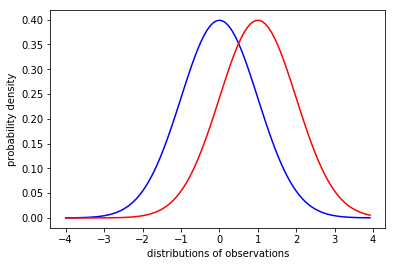

In [5]:
plot(x, y1, 'b-')
plot(x, y2, 'r-')
xlabel('distributions of observations')
ylabel('probability density');

#### Plot distribution of means for sample 1 and sample 2

In [6]:
sdm1 = sd1 / sqrt(n)
sdm2 = sd2 / sqrt(n)
dist1m = stats.norm(mu1, sdm1)
y1m = dist1m.pdf(x)
dist2m = stats.norm(mu2, sdm2)
y2m = dist2m.pdf(x)

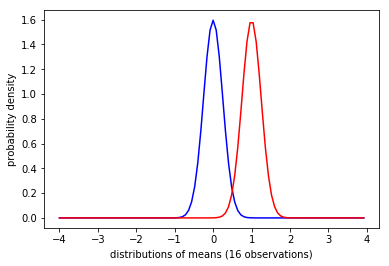

In [7]:
plot(x, y1m, 'b-')
plot(x, y2m, 'r-')
xlabel('distributions of means (16 observations)')
ylabel('probability density');

#### Run simulations

In [8]:
cor = 0.0   #correlation = 0
#set covariance matrix
var1 = sd1**2
var2 = sd2**2
sigma = np.array([[var1, cor], [cor, var2]]) #matrix(c(myvar1,mycor,mycor,myvar2),2,2)

In [9]:
#initialisations
mean = np.array([mu1, mu2])
truediff = mean[1] - mean[0]
pval = np.zeros(nsim)
loCI = np.zeros(nsim)
hiCI = np.zeros(nsim)
diff = np.zeros(nsim)
nsig = 0  #counts number of pval between ??? and Pmax =0.0

In [10]:
# set random number generator seed so sequence repeats
#seed(1941)

In [12]:
nsim = 100
for r in range(nsim):
    s1, s2 = np.random.multivariate_normal(mean, sigma, n).T
    t, p = stats.ttest_ind(s1, s2, equal_var=False, nan_policy='omit')
    diff[r] = np.mean(s1) - np.mean(s2)
    pval[r] = p
    if p > Pmin and p <= Pmax:
        nsig += 1

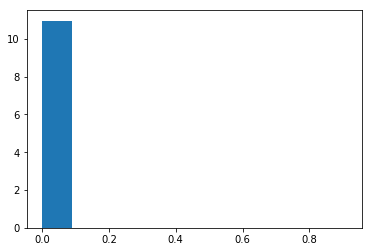

In [21]:
plt.hist(pval, bins=10, density=True);